# Python'da Uygulamalı Makine Öğrenmesi 1. Hafta

## Fruit Data with Colors

### Veriyi içe aktarma ve inceleme

Bu örnek, farklı meyve türlerini ayırt etmek için bir sınıflandırma modeli oluşturma örneğidir.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
fruits.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [4]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [5]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [6]:
fruits.duplicated().sum()

0

In [7]:
fruits["fruit_label"].value_counts()

fruit_label
1    19
3    19
4    16
2     5
Name: count, dtype: int64

In [8]:
fruits["fruit_name"].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [9]:
fruits["fruit_label"].unique()

array([1, 2, 3, 4], dtype=int64)

In [10]:
fruits["fruit_name"].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [11]:
#fruit_name adlı bir sözlükte, fruit_label sütununu key, fruit_name sütununu value olarak oluşturuyoruz 
fruit_name = dict(zip(fruits["fruit_label"].unique(), fruits["fruit_name"].unique()))
fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

+ Bu dictionary, ileride sınıflandırma yaparken etiket olarak ve `predict` edilen (tahmin) yeni gözlemlerin hangi sınıfa girdiğini, kullanıcının daha rahat anlayabilmesi için kullanılacak.

**`Not:`**

+ color_score sütunundaki değerler bu görselle ifade edilebilir:

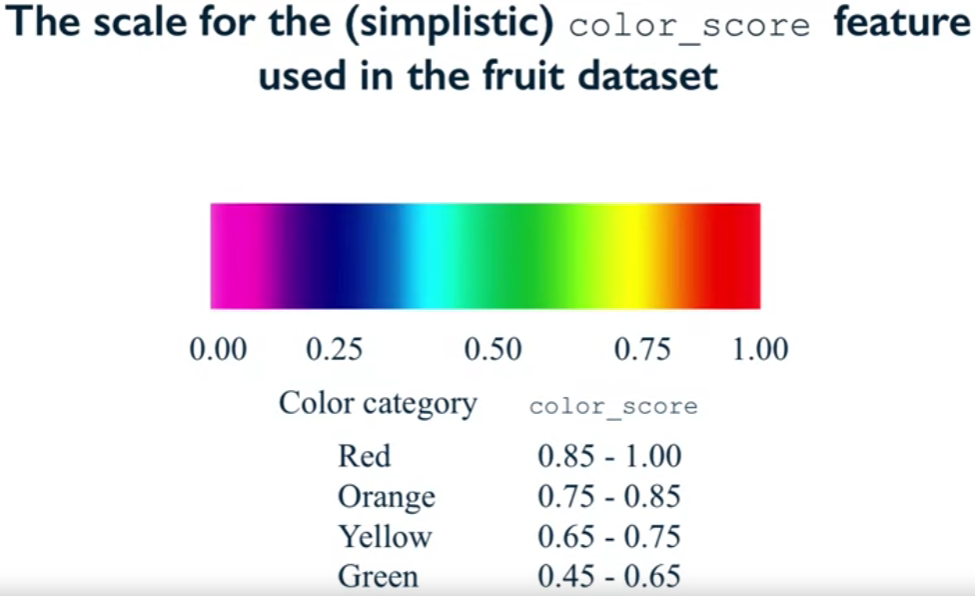

### Train ve Test Set'leri ayarlama 

In [12]:
X = fruits[["mass", "width", "height"]] 
y = fruits["fruit_label"] 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)                                                                          

**`X = fruits[["mass", "width", "height"]]`** : 

+ X değişkeni girdileri temsil eder ve mass, width ve height sütunlarını içeren yeni bir dataframe olur. Bunu da [[...]] şeklindeki iç içe köşeli parantez ifadesi sağlar.

**`y = fruits["fruit_label"]`** :

+ y değişkeni, çıktıları temsil eder.

**`X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)`** :

+ Scikit-Learn'de `train_test_split` işlevi ile veri setini, train ve test olarak böldük. X_train ve y_train ile modeli eğitip X_test ve y_test ile modelin doğruluğunu test edeceğiz.

+ `random_state` parametresi veri kümesini rastgele ikiye bölerken kullanılan rastgele sayı üretecinin başlangıç durumunu belirler. Bu parametre, **aynı random_state değeri kullanıldığında, her zaman aynı rastgele bölmenin oluşturulmasını sağlar**. **Yani, aynı veri kümesi üzerinde aynı random_state değeriyle çalıştığınızda, her seferinde aynı eğitim ve test seti bölünmelerini elde ederiz**.

In [13]:
print("fruits shape:", fruits.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

fruits shape: (59, 7)
X_train shape: (44, 3)
X_test shape: (15, 3)
y_train shape: (44,)
y_test shape: (15,)


In [14]:
X_train

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0
49,132,5.8,8.7
29,160,7.0,7.4
37,154,7.3,7.3
56,116,5.9,8.1
18,162,7.5,7.1


In [15]:
X_test

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6
2,176,7.4,7.2
34,142,7.6,7.8
46,216,7.3,10.2
40,154,7.1,7.5
22,140,7.3,7.1


In [16]:
y_train

42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

In [17]:
y_test

26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
30    3
41    3
33    3
Name: fruit_label, dtype: int64

### Veriyi daha derinlemesine incelemek için görselleştirme yapma

Bunun yapılmasının sebebi, görseller aracılığıyla veriye dair daha fazla fikir edilebilme imkanının olmasıdır.

C:\Users\ozero\AppData\Local\Temp\ipykernel_4632\414060951.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("gnuplot")


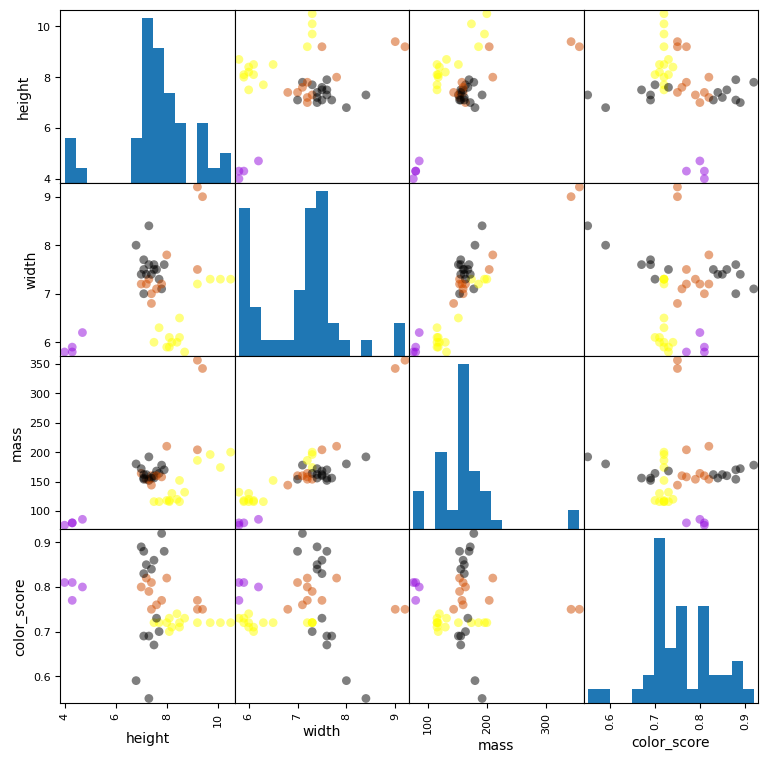

In [18]:
#2 boyutlu scatter matrix ile görselleştirme
from matplotlib import cm 
X = fruits[["height", "width", "mass", "color_score"]]
y = fruits["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

cmap = cm.get_cmap("gnuplot")
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = "o", s = 40, hist_kwds = {"bins": 15},
                                    figsize = (9,9), cmap = cmap)

**`X = fruits[["height", "width", "mass", "color_score"]]:`**

+ X değişkenine, height, width, mass ve color_score sütunlarından oluşan bir dataframe atar

**`y = fruits["fruit_label"]:`**

+ y değişkenine, fruit veri setindeki, fruit_label sütununu atar

**`X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0):`**

+ Scikit-Learn'den train_test_split işlevini kullanarak X değişkenini eğitim ve y değişkenini etiket olarak alıp train ve test veri setlerini oluşturur.

**`cmap = cm.get_cmap("gnuplot")`**

**`scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = "o", s = 40, hist_kwds = {"bins": 15},
                                    figsize = (9,9), cmap = cmap):`**

+ Bir dağılım matrisi oluşturarak, özellik uzayındaki ilişkileri ve sınıflandırmayı görselleştirir.
+ X_train: Eğitim veri setindeki özellikler
+ y_train: Eğitim veri setindeki etiketler
+ scatter_matrix fonksiyonu: Veri setindeki özelliklerin çiftler arasındaki ilişkiyi gösteren bir matris çizimi oluşturur.
+ c = y_train: Renklendirmek için kullanılacak sınıflandırma etiketleri. Her bir sınıf farklı bir renkte gösterilir.
+ marker = "o": Nokta marker'ları kullanılacak
+ s = 40: Nokta marker'larının boyutu
+ hist_kwds = {"bins": 15}: Histogram çubuklarının sayısı
+ figsize = (9,9): Çizimin figür boyutu
+ cmap = cmap: Renk haritası. 'gnuplot' renk haritası kullanılacak

**`Grafiğin Yorumlanması:`**

+ Örneğin X = height ve Y = height veya X = mass ve Y = mass olarak denk gelen, yani X ve Y eksenlerine aynı denk gelen özelliklerden oluşan histogram grafikleri, eğitim setindeki tüm gözlemler için o özelliğin dağılımını gösterir
+ Dağılım grafikleri ise X ve Y eksenlerinde kesişen özelliklere göre eğitim setindeki gözlemlerin dağılışını gösterir

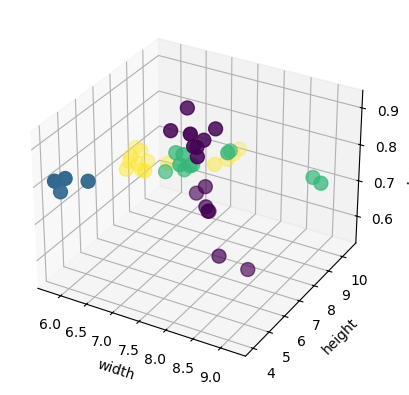

In [19]:
#3 boyutlu görselleştirme
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_train["width"], X_train["height"], X_train["color_score"], c = y_train, marker = "o", s = 100)
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_score")
plt.show()

### Sınıflandırma algoritmasını oluşturma ve eğitme (kNN = k-Nearest Neighbors algoritması ile) 

KNN (k-Nearest Neighbors) algoritması, bir Supervised ve Classification algoritmasıdır. Temel fikir: Bir veri noktaısnı sınıflandırmak istediğimizde, bu noktanın komuşularına bakarız (`k` parametresi, bakılacak komşu sayısını temsil eder). Daha sonra, bu komşuların etiketlerine bakarak, yeni veri noktasının sınıfını belirleriz. Örneğin, veri noktasının yakınında çoğunlukla `A` sınıfına ait komşular varsa, yeni veri noktası `A` olarak sınıflandırılır. Bu algoritmanın temel olarak 3 adımı vardır: 

**`Adım 1:`**
+ Sınıflandırılmak istenen veri noktasına, koordinat sisteminde en yakın olan K adet örneğe bakar. ('En yakın' hesabı farklı metotlarla da yapılabilir)

**`Adım 2:`**
+ Baktığı K adet örneğin etiketlerini arar.

**`Adım 3:`**
+ Etiketlerini bulduğu K adet örnekte, en çok etiket hangisiyse, yeni veri noktasının etiketini de en çok olarak bulduğu etiket olarak ayarlar. ('Karar verme' hesabı farklı metotlarla da yapılabilir)

In [20]:
#Train ve Test Set'leri oluşturuyoruz
X = fruits[["mass", "height", "width"]]
y = fruits["fruit_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
#Classifier object (sınıflandırıcı nesne) oluşturuyoruz
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

+ `n_neighbors = 5` parametresi, bir veri noktasını sınıflandırmak için o noktaya en yakın 5 komşunun kullanılmasını sağlayacaktır.

In [22]:
#Train veri setini kullanarak, oluşturduğumuz classifier object (sınıflandırıcıyı) eğitiyoruz
knn.fit(X_train, y_train)

KNeighborsClassifier()

+ Bu noktaya kadar yapılan işlemlerin sonucunda model, eğitilmiş ve eğitim seti (X_train ve y_train) üzerindeki ilişkileri öğrenmiştir. 

### Test verilerini kullanarak, eğitilen modelin doğruluğunu tahmin etme

In [23]:
knn.score(X_test, y_test)

0.5333333333333333

### Daha önce görülmemiş örneklerin üzerinde, eğittiğimiz kNN modelini kullanma (PREDICT = TAHMİN)

Bu işleme `Predict (tahmin)` adı verilir. Eğitilen algoritma, yeni örnekler üzerinde denenir. 

In [24]:
#Örnek 1: mass = 20g, width = 4.3cm, height = 5.5cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print("Meyve:", fruit_name[fruit_prediction[0]])
print("Sınıfı:", fruit_prediction)

Meyve: mandarin
Sınıfı: [2]


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
#Örnek 2: mass = 100g, width = 6.3cm, height = 8.5cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
print("Meyve:", fruit_name[fruit_prediction[0]])
print("Sınıfı:", fruit_prediction)

Meyve: lemon
Sınıfı: [4]


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
#Örnek 3: mass = 4g, width = 4cm, height = 4cm
fruit_prediction = knn.predict([[4, 4, 4]])
print("Meyve:", fruit_name[fruit_prediction[0]])
print("Sınıfı:", fruit_prediction)

Meyve: mandarin
Sınıfı: [2]


C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Eğittiğimiz kNN modelinin doğruluğunun, seçilen K parametresine göre değişimini görselleştirme

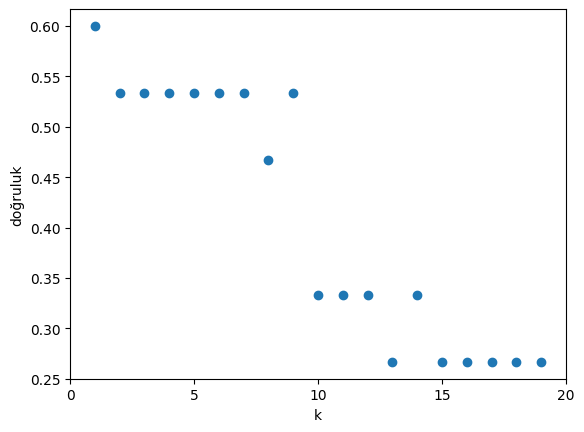

In [27]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel("k")
plt.ylabel("doğruluk")
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20]);

+ Doğruluk oranı, K parametresi arttıkça azalış gösteriyor. 

### Eğittiğimiz kNN modelinin doğruluğunun, Train ve Test setlerinin oranına göre değişimini görselleştirme

Text(0, 0.5, 'Doğruluk')

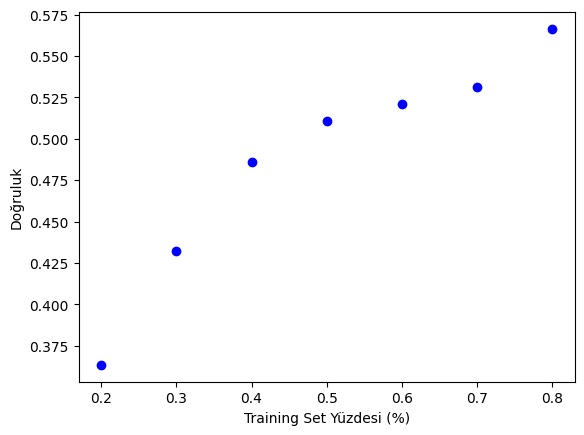

In [28]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure()

for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), "bo")

plt.xlabel("Training Set Yüzdesi (%)")
plt.ylabel("Doğruluk")